**Replace with your name and a brief description of the notebook.**

# Homework 3: assessing data and Seaborn scatterplots

While we have looked at the Green Taxi Trip data set before, we have never assessed the data following the 5 questions in the lab or removed missing data.

Recall that this data set is a record of all green taxi trips taken on Feb. 3, 2021.

Link: [https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/Feb3_2021_Green_Taxi_Trip_Data.csv](https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/Feb3_2021_Green_Taxi_Trip_Data.csv)

More information about the columns is given in [this Excel file](https://data.cityofnewyork.us/api/views/djnb-wcxt/files/23caabae-f35b-4031-bfbd-cd3e9437aced?download=true&filename=MD_TLC_GreenTripRecords2020.xlsx) 
which can also be downloaded from the [2021 Green Taxi Trip Data page](https://data.cityofnewyork.us/Transportation/2021-Green-Taxi-Trip-Data-Jan-Jul-/djnb-wcxt).

### Question 0:  Load the data

Load the green taxi trip data into a DataFrame.

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

In [6]:
taxis = pd.read_csv("https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/Feb3_2021_Green_Taxi_Trip_Data.csv")

### Question 1:  Reduce the data

We will create a smaller taxi data set to use in the rest of the homework.  To do this:

a) add a column called `toll` that contains a 1 if the `tolls_amount` column is positive, and a 0 otherwise
<details><summary>Hint:</summary>
See Section 6 in Lab 1.
</details>

b) make a new DataFrame containing only the columns:

* `lpep_pickup_datetime`
* `RatecodeID`
* `DOLocationID`
* `trip_distance`
* `total_amount`
* `toll`

In [8]:
def is_positive(x):
    if x > 0:
        return 1
    else:
        return 0
    
taxis["toll"] = taxis["tolls_amount"].apply(is_positive)

In [10]:
taxis2 = taxis[['lpep_pickup_datetime', 'RatecodeID', 'DOLocationID', 'trip_distance', 'total_amount', 'toll']]

### Question 2:  Assess the data

Answer the following questions about the reduced, 6 column taxi data.

a) What is the structure of the data?  What are the variable types for the columns? (refer to the second tab in the Excel file linked above for information about each column)

In [16]:
taxis2.dtypes

lpep_pickup_datetime     object
RatecodeID              float64
DOLocationID              int64
trip_distance           float64
total_amount            float64
toll                      int64
dtype: object

In [17]:
taxis2.head()

,lpep_pickup_datetime,RatecodeID,DOLocationID,trip_distance,total_amount,toll
0,02/03/2021 12:03:44 AM,1.0,142,2.77,19.03,0
1,02/03/2021 12:05:09 AM,1.0,75,1.15,9.75,0
2,02/03/2021 12:09:26 AM,1.0,74,1.41,8.76,0
3,02/03/2021 12:18:16 AM,1.0,127,6.19,24.96,0
4,02/03/2021 12:19:05 AM,5.0,69,2.74,12.30,0


<b>Answer 2a:</b> The taxi data is rectangular and includes three continuous variables (pickup time, distance, amount) and three categorical variables (rate code id, location id, and toll). There are three float columns, two integer columns, and one string column that stores the date of the trip.

b) What is the granularity of the data?  That is, what does each row represent?  Is this the finest granularity possible?

<b>Answer 2b:</b> The data is structured such that each row represents a taxi trip. We cannot necessarily divide these trips any further, so this is the finest granularity possible.

c) What times are contained in the data?  What information do we have for each time?  Do you think the times are accurate?  Why or why not?

<b>Answer 2c:</b> The times contain the date, hour, minute, and second of the trip. I believe these times are accurate as they are automatically recorded by the meter, not by the driver.

### Question 3:  Data faithfulness

Use `.describe()` to get information about all columns.

In [18]:
taxis2.describe()

,RatecodeID,DOLocationID,trip_distance,total_amount,toll
count,1297.000000,2281.000000,2281.000000,2281.00000,2281.000000
mean,1.140324,130.852696,49.399842,23.23868,0.076721
std,0.729906,75.899733,2148.602160,15.63078,0.266206
min,1.000000,3.000000,0.000000,-52.80000,0.000000
25%,1.000000,70.000000,1.350000,12.06000,0.000000
50%,1.000000,129.000000,2.530000,20.13000,0.000000
75%,1.000000,197.000000,5.570000,29.00000,0.000000
max,5.000000,265.000000,102620.980000,130.80000,1.000000


Which columns contain missing data?  Do you notice any other problems with the data?

<b>Answer:</b> `RateCodeID` seems to be missing many rows. Another interesting feature is that the maximum trip distance recorded was 102,620.89 miles, which I believe threw off the column's summary stats. Additionally, the minimum total amount was -$52.80, which should be impossible

### Question 4:  Removing missing data

Clean the data by removing all rows containing any missing data.  That is, make a new DataFrame containing all rows except those missing data.

<details><summary>Hint:</summary>
First use a filter to find all rows with at least one missing data value.  Then make a new DataFrame without those rows, using ~ as in Section 3 of Lab 3.
</details>

In [20]:
taxis3 = taxis2[taxis2.isna().any(axis=1)]

In [21]:
print(f"Removed {taxis2.shape[0]-taxis3.shape[0]} rows of data.")

Removed 1297 rows of data.


How many rows of data did you remove?  Could there be a downside to removing these rows?

<b>Answer:</b> I removed 1297 rows of data. A potential downside is that we may now have skewed our data one way or the other. This would make our analysis less reliable.

### Question 5:  More data cleaning
You may have noticed that some of the total amounts are negative.  Further clean the data by making a new DataFrame containing only those rows with 0 or a positive amount in the `total_amount` column.

In [28]:
taxis4 = taxis3[taxis3['total_amount'] >= 0]

How many rows did you remove?  Do you think this step improves or does not improve the quality of the data?

In [29]:
print(f"Removed {taxis3.shape[0] - taxis4.shape[0]} rows of data.")

Removed 0 rows of data.


<b>Answer:</b> No additional rows of data were removed. All of those values must have been removed in the cleaning done in Question 4. Thus the data's quality remains the same between Question 4 and 5.

### Question 6:  Scatterplots

Using the cleaned DataFrame from the end of Question 5 (or any earlier DataFrame, if you had trouble cleaning the data), use Seaborn to create a scatter plot of the trip distance (x axis) vs. the total amount (y axis), colored by the `toll` column.

As usual, your plot should have a title and axis labels.

If you wish to make the points transparent, you can use the `alpha = 0.5` parameter, where 0.5 is how transparent the points are and can be changed.

In [31]:
taxis4

,lpep_pickup_datetime,RatecodeID,DOLocationID,trip_distance,total_amount,toll
7,02/03/2021 12:26:00 AM,NaN,68,5.08,32.50,0
10,02/03/2021 01:08:00 AM,NaN,189,8.78,25.38,0
11,02/03/2021 01:14:00 AM,NaN,95,0.00,18.05,0
12,02/03/2021 01:16:00 AM,NaN,191,8.34,43.00,0
16,02/03/2021 01:26:00 AM,NaN,95,0.00,17.75,0
...,...,...,...,...,...,...
2259,02/03/2021 11:10:00 PM,NaN,143,3.95,19.51,0
2263,02/03/2021 11:18:00 PM,NaN,244,5.93,36.00,0
2267,02/03/2021 11:22:00 PM,NaN,117,13.66,57.30,1
2274,02/03/2021 11:34:00 PM,NaN,51,6.44,27.67,0


Text(0.5, 1.0, 'Trip distance vs total amount for taxi ribes')

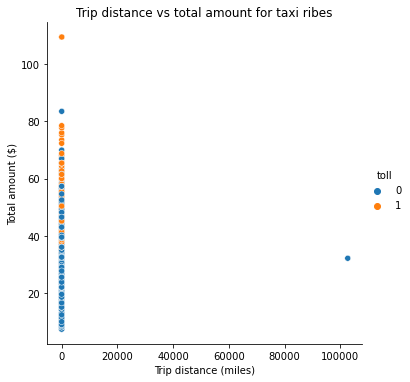

In [37]:
sns.relplot(x ="trip_distance", y = "total_amount", hue = "toll", data = taxis4)
plt.xlabel("Trip distance (miles)")
plt.ylabel("Total amount ($)")
plt.title("Trip distance vs total amount for taxi ribes")

What do you notice about your plot?  Do you see any more data that could indicate an error or problem with that data?  How informative is the plot?

<b>Answer:</b> The plot is not informative at all. Without removing outliers from the data, we are left with a skewed dataset. The inclusion of the 100k-mile outlier has made the plot uninterpretable.

### Bonus Question
Plot an interesting scatterplot using some part of the pickup time for one (or more) of the variables.  What does your plot reveal about the data?